# Lecture 3 Notes done in the lecture about Data preprocessing for Decision tree

## Imports the necessary libraries for the following processes

-In fetch_openml ther are different number of public domain dataases such as the "Titatinc" database that will be used later on

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

## Fetches the Titanic database values

-Assigns the X values (the <span style="color:green;">Features.</span>) to df_X


-Assigns the Y values (the <span style="color:blue;">Labels.</span>) to df_y

In [72]:
df_X,df_y = fetch_openml("titanic",version=1, return_X_y=True, parser='auto')

In [73]:
df_X

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


## Display histogram

-Display histogram of the 'pclass' feature.

-Sets the label in the X axis to 'Class'.

-Plots only the values in 2 and 3 (As there is no other possible value and they are categorical).

-Sets the label in the Y axis to 'Number of passangers'.

Text(0, 0.5, 'Number of passangers')

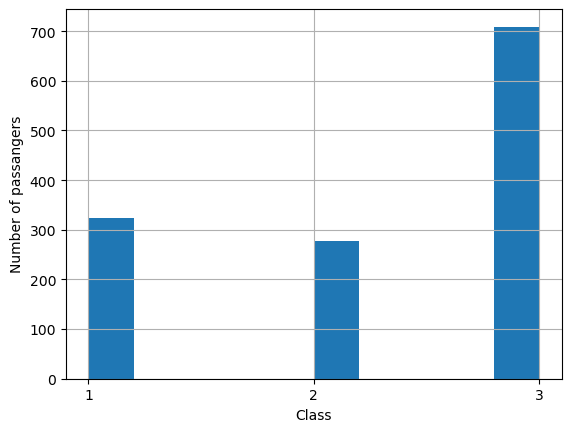

In [74]:
df_X['pclass'].hist()  
plt.xlabel('Class') 
plt.xticks([1,2,3]) 
plt.ylabel('Number of passangers')

## Checks how many values are null in each feature

In [83]:
df_X.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
dtype: int64

## Drops unecessary features

The features that are going to be "Dropped" (removed) are not relevant to our data analysis of knowing if the passanger has survived or not. (The features removed are name, body, ticket, cabin, and home destination)

In [76]:
df_X = df_X.drop(['name','body','ticket','cabin','home.dest','boat'],axis=1)

In [77]:
df_X

,pclass,sex,age,sibsp,parch,fare,embarked
0,1,female,29.0000,0,0,211.3375,S
1,1,male,0.9167,1,2,151.5500,S
2,1,female,2.0000,1,2,151.5500,S
3,1,male,30.0000,1,2,151.5500,S
4,1,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...
1304,3,female,14.5000,1,0,14.4542,C
1305,3,female,NaN,1,0,14.4542,C
1306,3,male,26.5000,0,0,7.2250,C
1307,3,male,27.0000,0,0,7.2250,C


## Sets the NULL values in Embarked feature to the mode of embarked

First line of code get the mode of the "embarked" feature and sets it to the variable "embarkedMode" and then with "fillna" we pass it the embarkedMode variable and set it to fill all the NULL variables that are in "embarked"

In [78]:
embarkedMode = df_X['embarked'].mode()
df_X['embarked'] = df_X['embarked'].fillna(embarkedMode)

## Sets the missing value of fare to the mean

In [79]:
df_X['fare'] = df_X['fare'].fillna(df_X['fare'].mean())

In [80]:
df_X['fare']

0       211.3375
1       151.5500
2       151.5500
3       151.5500
4       151.5500
          ...   
1304     14.4542
1305     14.4542
1306      7.2250
1307      7.2250
1308      7.8750
Name: fare, Length: 1309, dtype: float64

## Sets  missing age values to the mean

In [81]:
df_X['age'] = df_X['age'].fillna(df_X['age'].mean())

In [82]:
df_X['age'].isnull().sum()

0

## Starting from 0 updates all values to be integers in feature

This is done so all the values that are strings are set to numerical values (the distinction between them will be preserved).

In [84]:
df_X['embarked'] = pd.factorize(df_X['embarked'])[0]
df_X['sex'] = pd.factorize(df_X['sex'])[0]

In [85]:
df_X.dtypes

pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

## Splits the training and testing groups

In [86]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,test_size=0.3)

## Starts the training of the model (Decision tree)

The "max_depth" argument for "DecisionTreeClasifier" sets how many internal nodes (levels) would the decision tree model have, and the "random_state" argument sets if the testing in those nodes is random

**We have to this arguments accordingly so we have the best result (not overfitting and not underfitting)**

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
t_model = DecisionTreeClassifier(max_depth = 4,random_state = 1)
t_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

## Visualize the Decision tree visualy

<span style="color:orange;">The cells that are in orange indicate that the passed samples passed mean that they did not survive.</span>

<span style="color:blue;">The cells that are in blue indicate that the passed smaples passed mean that they DID survive.</span>

**The shade of blue indicate how strong it gave one result from the other (for instance if the shade of blue is stronger, then it means that the values that went through that node had more samples with a chance of surviving)**

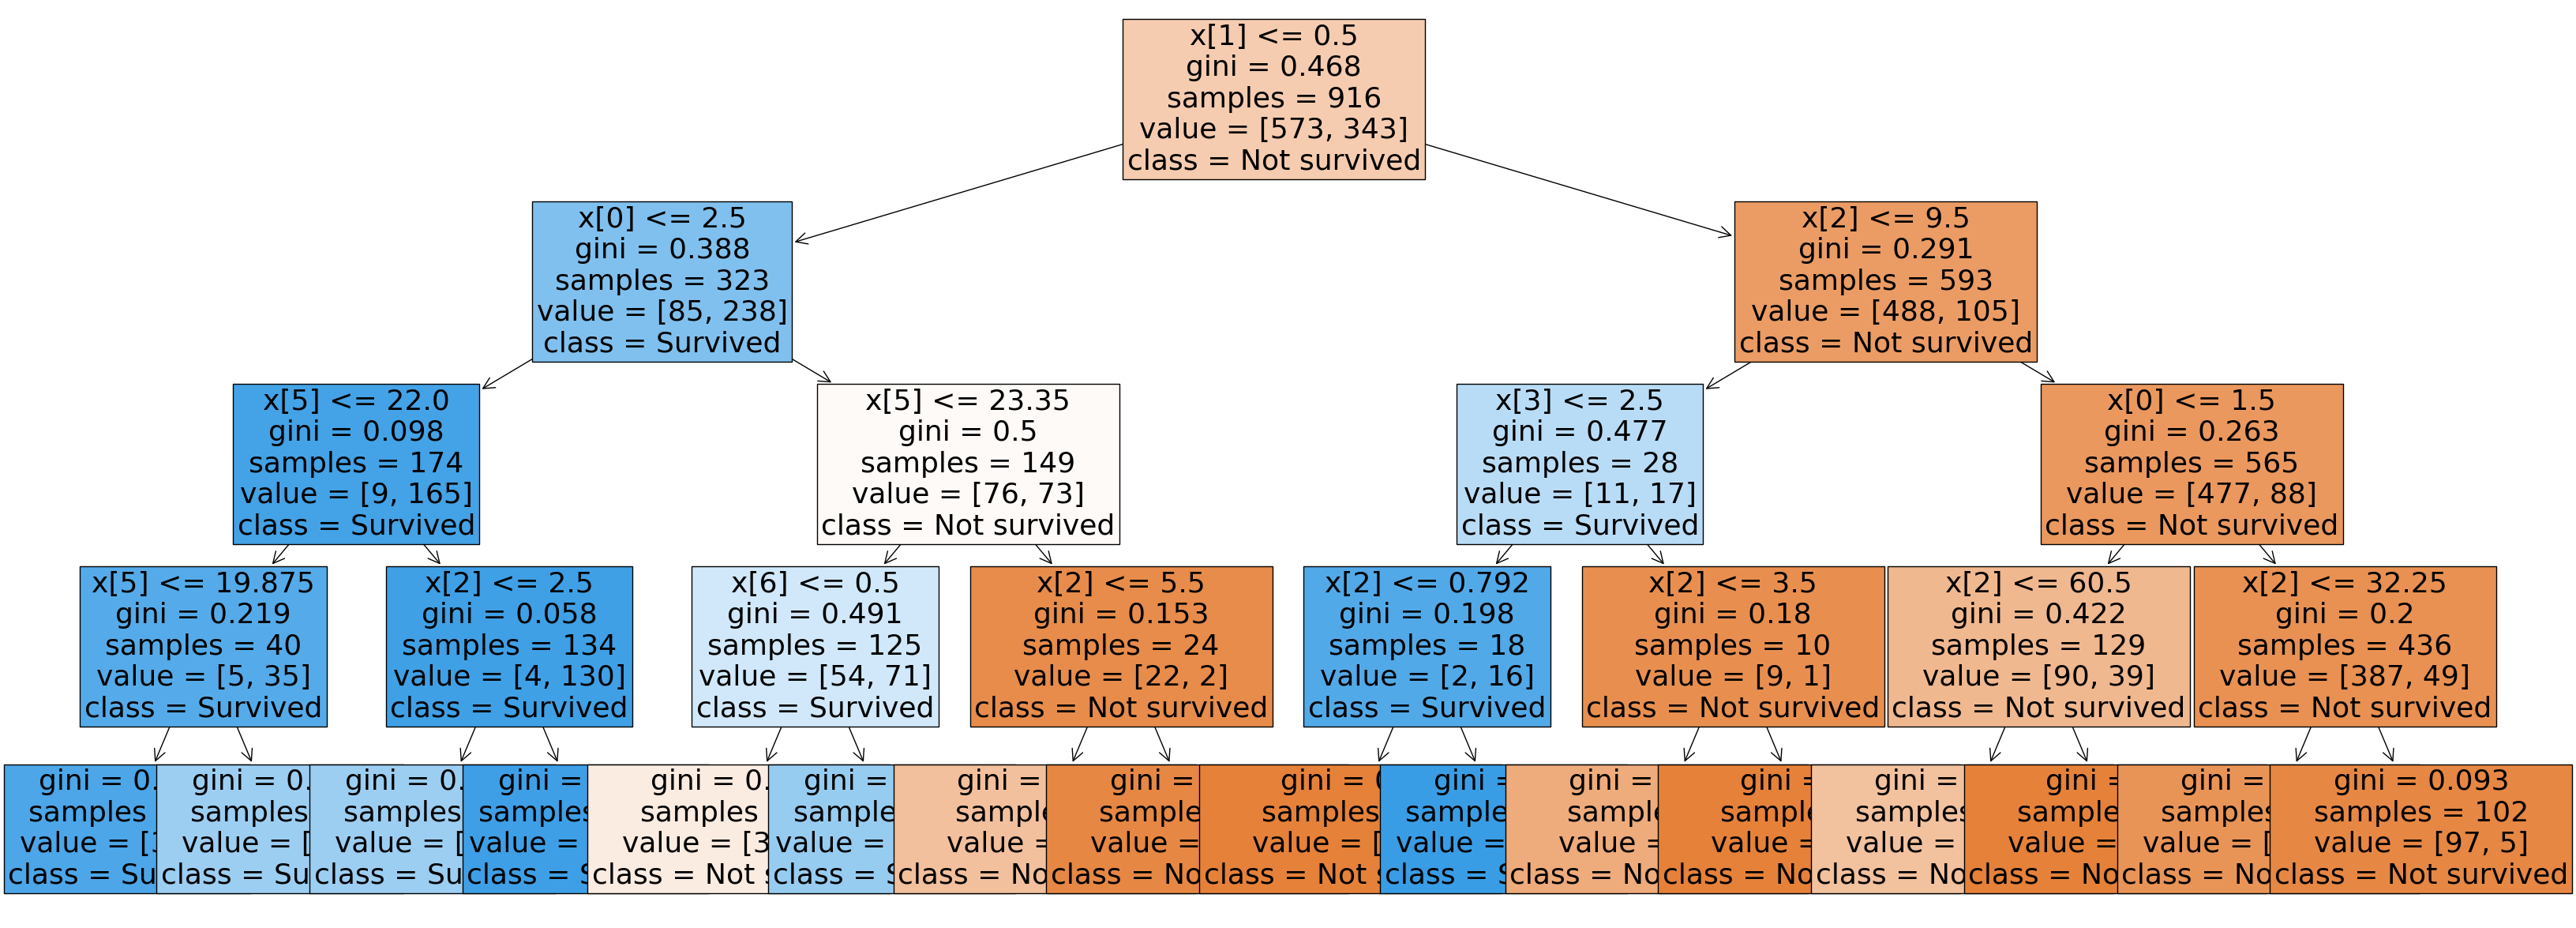

In [97]:
from sklearn import tree
plt.figure(figsize=(40,15))
tree.plot_tree(t_model, class_names=['Not survived','Survived'],filled=True,fontsize=26)
plt.show()

## Tests the model and printrs accuracy

In [98]:
y_predict = t_model.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_predict))

0.7684478371501272


## Visualizes with a confusion matrix how accurate was the prediction

In a confusion matrix we have four boxes that each represent something

-**Upper-left:** indicates the True positives (How many that survived were correctly predicted)

-**Upper-right:** indicates the Fase positives (How many were wronglly labeled as survived)

-**Lower-left:** indicates the False negatives (How many were wronglly labeled as "Not survived")

-**Lower-right:** indicates the Tue negatives (How many were correctly predicted to "Not survive")

In [103]:
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test,y_predict)

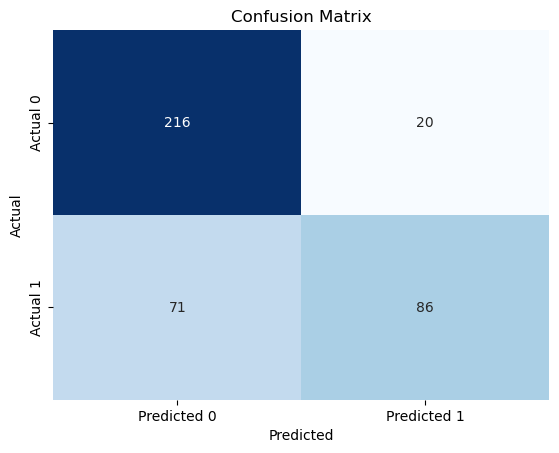

In [106]:
import seaborn as sns
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()